In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import skew
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None)
%matplotlib inline
import datetime
import data_utils as du
plt.style.use('ggplot')
sns.set()


## 1- Boston Airbnb Business Analysis and Listing price prediction
Airbnb is an online marketplace that arranges and offers rooms or houses in which people can stay temporarily. The company is just a broker that connects renters and owners, then gets commissions for each booking. I offer here an analysis on how the business has been growing in Boston. Whether you are a host or a guest, it is important to have an inform decision about the business, and decide when to list your property for rent, or visit the city at affordable price.

We are going to analyse the Boston Airbnb data by answering these business questions:

1- How has the AirbnB business growth or evolution in Boston ? </br>
2- what are the most popular neigbourhoud ? and what make them popular ?</br>
3- When is the busiest time for the business ?</br>
4- What features are most related to the  price ?</br>
5- Can we predict the price of a given listing ? </br> 

In [2]:
#reading Data
boston_reviews,boston_listings,boston_calendar = du.read_data()
listings = boston_listings.copy()
#Data set size 
print(f"Boston listings has {boston_listings.shape[0]} rows and {boston_listings.shape[1]} columns")
print(f"Boston reviews  has {boston_reviews.shape[0]}  rows and {boston_reviews.shape[1]}  columns")
print(f"Boston Calendar has {boston_calendar.shape[0]} rows and {boston_calendar.shape[1]} columns")


Boston listings has 3585 rows and 95 columns
Boston reviews  has 68275  rows and 6  columns
Boston Calendar has 1308890 rows and 4 columns


## 2 -Understanding the dataset
- boston_reviews  : unique id for each reviewer and detailed comments
- boston_listings : Listings, including full descriptions and average review score
- boston_calendar : including listing id and the price and availability for that day

### 2.1 Listings data 
Our main dataset has 95 columns, which is a lot of features to go through. As we can see on the snapshot of the data, there are some columns that are more informative that do not influence our analysis and we can get rid of. Those columns are:

['listing_url','scrape_id','jurisdiction_names','license','thumbnail_url','medium_url','picture_url',
 'xl_picture_url','host_thumbnail_url','host_picture_url','notes','transit','access','interaction','house_rules','host_url','host_location','host_about',
 'host_neighbourhood','host_verifications','street','country_code','country','jurisdiction_names','license','notes'
 ]       


In [3]:
boston_listings.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,nan,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.28,-71.13,t,House,Entire home/apt,4,1.50,2.00,3.00,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",nan,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,nan,0,0,0,0,2016-09-06,0,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,f,nan,nan,f,moderate,f,f,1,nan
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United States",

In [4]:
#remove unused columns
cols_drops=['listing_url','scrape_id','jurisdiction_names','license','thumbnail_url','medium_url','picture_url',
            'xl_picture_url','host_thumbnail_url','host_picture_url','notes','transit','access','interaction','house_rules','host_url','host_location','host_about',
            'host_neighbourhood','host_verifications','street','country_code','country','jurisdiction_names','license','notes']
boston_listings= boston_listings.drop(cols_drops, axis=1)
boston_listings.shape

(3585, 72)

In [5]:
#Missing values
data_info = pd.DataFrame(boston_listings.dtypes).T.rename(index={0:'column type'})
data_info = data_info.append(pd.DataFrame(boston_listings.isnull().sum()).T.rename(index={0:'null values(nb)'}))
data_info = data_info.append(pd.DataFrame(boston_listings.isnull().sum()/boston_listings.shape[0]*100).T.rename(index={0:'null values (%)'}))
data_info

,id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,host_id,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
column type,int64,object,object,object,object,object,object,object,int64,object,object,object,object,object,object,int64,int64,object,object,object,object,float64,object,object,object,object,object,float64,float64,object,object,object,int64,float64,float64,float64,object,object,float64,object,object,object,object,object,int64,object,int64,int64,object,float64,int64,int64,int64,int64,object,int64,object,object,float64,float64,float64,float64,float64,float64,float64,object,object,object,object,object,int64,float64
null values(nb),0,0,0,143,1057,0,0,1415,0,0,0,471,471,471,0,0,0,0,0,543,0,3585,2,0,38,14,0,0,0,0,3,0,0,14,10,9,0,0,3529,0,2693,2697,2243,1107,0,0,0,0,0,3585,0,0,0,0,0,0,756,756,813,823,818,820,818,822,821,0,0,0,0,0,0,756
null values (%),0.00,0.00,0.00,3.99,29.48,0.00,0.00,39.47,0.00,0.00,0.00,13.14,13.14,13.14,0.00,0.00,0.00,0.00,0.00,15.15,0.00,100.00,0.06,0.00,1.06,0.39,0.00,0.00,0.00,0.00,0.08,0.00,0.00,0.39,0.28,0.25,0.00,0.00,98.44,0.00,75.12,75.23,62.57,30.88,0.00,0.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,21.09,21.09,22.68,22.96,22.82,22.87,22.82,22.93,22.90,0.00,0.00,0.00,0.00,0.00,0.00,21.09


#### 2.2 reviews data set
The reviews dataset has 68275  rows and 6 columns. I has all the listings that were reviewed as well as the reviewers and the date of the review.

In [6]:
boston_reviews.head(3)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...


#### 2.2 Calendar data set
The Calendar dataset has 1308890 rows and 4 columns. For each listing on a given date, the the availability is provided as well as the price at which it was booked.

In [7]:
boston_calendar.head(3)

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN


## 3- Data preprocessing and data analysis
In this section, we will mainly cover data preprocessing and data analysis.


In [8]:
#Listing statistical properties
boston_listings[boston_listings.columns[1:]].describe().T

,count,mean,std,min,25%,50%,75%,max
host_id,"3,585.00","24,923,107.45","22,927,809.87","4,240.00","6,103,425.00","19,280,995.00","36,221,474.00","93,854,106.00"
host_listings_count,"3,585.00",58.90,171.12,0.00,1.00,2.00,7.00,749.00
host_total_listings_count,"3,585.00",58.90,171.12,0.00,1.00,2.00,7.00,749.00
neighbourhood_group_cleansed,0.00,nan,nan,nan,nan,nan,nan,nan
latitude,"3,585.00",42.34,0.02,42.24,42.33,42.35,42.35,42.39
longitude,"3,585.00",-71.08,0.03,-71.17,-71.11,-71.08,-71.06,-71.00
accommodates,"3,585.00",3.04,1.78,1.00,2.00,2.00,4.00,16.00
bathrooms,"3,571.00",1.22,0.50,0.00,1.00,1.00,1.00,6.00
bedrooms,"3,575.00",1.26,0.75,0.00,1.00,1.00,2.00,5.00
beds,"3,576.00",1.61,1.01,0.00,1.00,1.00,2.00,16.00


#### Missing Values

we see that some columns are all null such as `(has_availability,license,jurisdiction_names,neighbourhood_group_cleansed)` and some seems to have a lot of null values.
let's check the missing values count. We also see that these columns `['neighbourhood_group_cleansed', 'square_feet', 'weekly_price','monthly_price', 'has_availability', 'license', jurisdiction_names']` have more than 75% of missing values.

- We are going to drop all columns that have more than 75% of missing values. Filling those columns with mean or median will make them homogenius, that will not bring any significant value to our price prediction.
- For any row of data, a listing, if the price value is missing, we should drop this row of data, since it will not help us predict the price when there is no price.

##### Which columns have more than 75% of missing values

In [9]:
colum_list = list(boston_listings.columns[boston_listings.isnull().mean()>0.75])
colum_list

['neighbourhood_group_cleansed',
 'square_feet',
 'weekly_price',
 'monthly_price',
 'has_availability']

In [10]:
# dopping columns with more than 75% of missing Data
boston_listings = boston_listings.drop(colum_list, axis=1)
boston_listings = boston_listings.dropna(subset=['price'], axis=0)
boston_listings.shape

(3585, 67)

#### Duplicated values
The id is the column that uniquely identifies each listing therefore, it is important to make sure it does not have any duplicated values.

In [11]:
##Checking if there is duplicates values in ListingId
boston_listings.duplicated().sum()

0

#### Cleaning Data
Currently, these columns `['price','cleaning_fee','extra_people']` have '$' and ',' that make the columns a string. We are going to clean those columns and convert them to numeric.
Also `[host_response_rate,host_acceptance_rate]` have a '%' sign, therefore, we will clean that as well.

In [12]:
cols = ['price','cleaning_fee','extra_people']
boston_listings[cols].head()

,price,cleaning_fee,extra_people
0,$250.00,$35.00,$0.00
1,$65.00,$10.00,$0.00
2,$65.00,NaN,$20.00
3,$75.00,$50.00,$25.00
4,$79.00,$15.00,$0.00


In [13]:
#cleaning pricing columns
price_clean   = lambda x: x.replace('$','') if str(x).startswith('$') else x
replace_comma = lambda x: x.replace(',','') if str(x).contains(',') else x

cols = ['price','cleaning_fee','extra_people']

for col in cols:
    boston_listings[col] = pd.to_numeric(boston_listings[col].apply(price_clean).str.replace(',',''))
boston_listings[cols].head()


,price,cleaning_fee,extra_people
0,250.00,35.00,0.00
1,65.00,10.00,0.00
2,65.00,nan,20.00
3,75.00,50.00,25.00
4,79.00,15.00,0.00


In [14]:
#cleaning rate columns
is_rate_cols = boston_listings.columns[boston_listings.columns.str.contains('rate')]
boston_listings[is_rate_cols].head()

,host_response_rate,host_acceptance_rate
0,NaN,NaN
1,100%,100%
2,100%,88%
3,100%,50%
4,100%,100%


In [15]:

rate_cols=boston_listings[is_rate_cols].columns.tolist()
rate_clean = lambda col: str(col).replace("%","") if str(col).endswith('%') else col

#Cleanin rate
for col in rate_cols:
    boston_listings[col] = pd.to_numeric(boston_listings[col].apply(rate_clean))

boston_listings[rate_cols].head()

,host_response_rate,host_acceptance_rate
0,nan,nan
1,100.00,100.00
2,100.00,88.00
3,100.00,50.00
4,100.00,100.00


#### Deriving year, month , day of the week
We have a the column `date_since` that contains the date that a particular host started to list on the plateform. Therefore, we will derive the day, month, year from that column that will help in our analysis

In [16]:
boston_listings['Year_since']=pd.DatetimeIndex(boston_listings['host_since']).year
boston_listings['Month_since']=pd.DatetimeIndex(boston_listings['host_since']).month
boston_listings['Month_Year_since']=pd.to_datetime(boston_listings['host_since']).dt.to_period('M')

#### What are the different room types

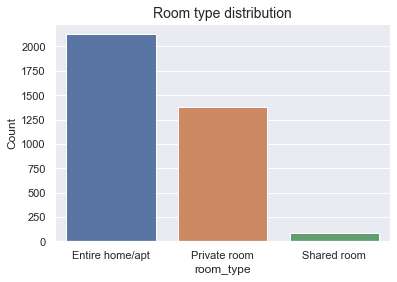

In [17]:
room = boston_listings['room_type'].value_counts().reset_index().rename(columns={'index':'room_type','room_type':'Count'})

sns.barplot(x='room_type',y='Count', data=room).set_title('Room type distribution', fontsize=14) ;

It looks like people usually let the entire room or apt  for rent 

## 3- Data Modeling
### 1- Business Evolution over the years
To analyse how the business has grown over the years, we are going to examine the column host_since, that tells us since when the host has registered. We will take a look that the availability in the calendar analyze the revenue evolution.
 #### a - How many people have registered over the years ?

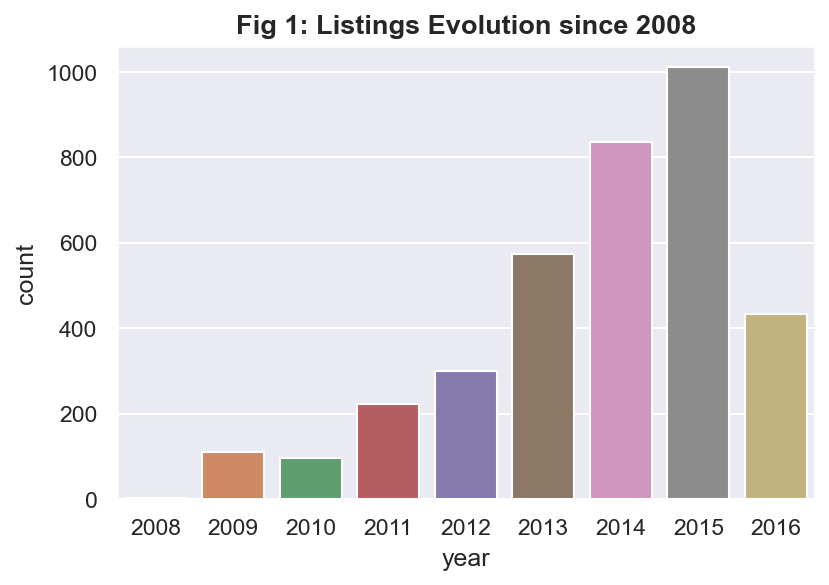

In [18]:
evolution = boston_listings[['Year_since','host_id']].groupby('Year_since').count().reset_index().rename(columns={'Year_since':'year','host_id':'count'})
fig = plt.figure(dpi=150)
sns.barplot(x='year',y='count',data=evolution).set_title('Fig 1: Listings Evolution since 2008', fontsize=13,weight='bold') ;
fig.savefig('images/evolution.png')

In [19]:
evolution

,year,count
0,2008,3
1,2009,110
2,2010,95
3,2011,222
4,2012,300
5,2013,575
6,2014,836
7,2015,1011
8,2016,433


In [20]:
max(boston_listings.host_since)

'2016-09-06'

The business started in Boston in 2008 with only 3 listings, and 110 the next year. The business has been growing consistantly over the years. We see a drop in 2016, but it is probably due to the last date that the data was collected.

#### b- How has revenue grown over the years ?
We are going to augment the calendar data set with Year, month and weekday

In [21]:
#adding year, month and yearMonth columns
boston_calendar['Year']=pd.DatetimeIndex(boston_calendar['date']).year
boston_calendar['Month']=pd.DatetimeIndex(boston_calendar['date']).month
boston_calendar['Month_Year']=pd.to_datetime(boston_calendar['date']).dt.to_period('M')
boston_calendar['Year_Month']=pd.to_datetime(boston_calendar['date']).dt.strftime("%Y-%m-01")
boston_calendar['weekday']=pd.to_datetime(boston_calendar['date']).dt.day_name()
boston_calendar.head()


,listing_id,date,available,price,Year,Month,Month_Year,Year_Month,weekday
0,12147973,2017-09-05,f,NaN,2017,9,2017-09,2017-09-01,Tuesday
1,12147973,2017-09-04,f,NaN,2017,9,2017-09,2017-09-01,Monday
2,12147973,2017-09-03,f,NaN,2017,9,2017-09,2017-09-01,Sunday
3,12147973,2017-09-02,f,NaN,2017,9,2017-09,2017-09-01,Saturday
4,12147973,2017-09-01,f,NaN,2017,9,2017-09,2017-09-01,Friday


In [22]:
#Convert date to seasons
def month_to_season(month):
    """
    INPUT
      month - a number representing the month of the year
    OUTPUT
      seasonId - return a number between (1-4) representing a season
                {1: 'winter', 2: 'spring',3: 'summer', 4: 'fall'}
    """
    return month%12//3 +1

seasons_mapping = {1: 'winter', 2: 'spring',3: 'summer', 4: 'fall'}
boston_calendar['season_id'] = boston_calendar['Month'].apply(month_to_season)
boston_calendar['season']=boston_calendar['season_id'].apply(lambda x :seasons_mapping[x])
boston_calendar['available']=boston_calendar['available'].apply(lambda x: 'Yes' if x=='t' else 'No')
boston_calendar.head()

,listing_id,date,available,price,Year,Month,Month_Year,Year_Month,weekday,season_id,season
0,12147973,2017-09-05,No,NaN,2017,9,2017-09,2017-09-01,Tuesday,4,fall
1,12147973,2017-09-04,No,NaN,2017,9,2017-09,2017-09-01,Monday,4,fall
2,12147973,2017-09-03,No,NaN,2017,9,2017-09,2017-09-01,Sunday,4,fall
3,12147973,2017-09-02,No,NaN,2017,9,2017-09,2017-09-01,Saturday,4,fall
4,12147973,2017-09-01,No,NaN,2017,9,2017-09,2017-09-01,Friday,4,fall


In [23]:
boston_calendar['available'].value_counts()

No     665853
Yes    643037
Name: available, dtype: int64

In [24]:
boston_calendar['price'] = boston_calendar['price'].astype(str).apply(price_clean).str.replace(',','').apply(pd.to_numeric, errors='coerce')

Looking at the List price in this data set, we see that the price is null when the listing is not available. Therefore, we are going to fill that value with the price from the listing dataset.


In [25]:
list_price = boston_listings[['id','price','neighbourhood_cleansed','room_type']]
list_price.columns = ['id','ListingPrice','neighbourhood','room_type']

boston_calendar = boston_calendar.merge(list_price, how='left', left_on='listing_id', right_on='id' )
boston_calendar['price'] = boston_calendar['price'].fillna(boston_calendar['ListingPrice']).apply(pd.to_numeric,errors='coerce')
boston_calendar = boston_calendar.drop(['id','ListingPrice'], axis=1)
boston_calendar.head()


,listing_id,date,available,price,Year,Month,Month_Year,Year_Month,weekday,season_id,season,neighbourhood,room_type
0,12147973,2017-09-05,No,250.00,2017,9,2017-09,2017-09-01,Tuesday,4,fall,Roslindale,Entire home/apt
1,12147973,2017-09-04,No,250.00,2017,9,2017-09,2017-09-01,Monday,4,fall,Roslindale,Entire home/apt
2,12147973,2017-09-03,No,250.00,2017,9,2017-09,2017-09-01,Sunday,4,fall,Roslindale,Entire home/apt
3,12147973,2017-09-02,No,250.00,2017,9,2017-09,2017-09-01,Saturday,4,fall,Roslindale,Entire home/apt
4,12147973,2017-09-01,No,250.00,2017,9,2017-09,2017-09-01,Friday,4,fall,Roslindale,Entire home/apt


In [26]:
boston_calendar.dtypes

listing_id           int64
date                object
available           object
price              float64
Year                 int64
Month                int64
Month_Year       period[M]
Year_Month          object
weekday             object
season_id            int64
season              object
neighbourhood       object
room_type           object
dtype: object

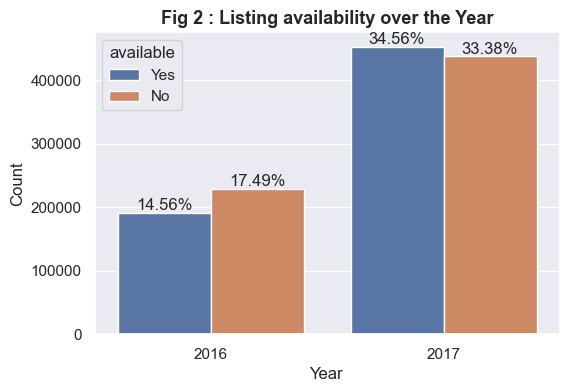

In [27]:
plot_data = boston_calendar[['Year','available']].value_counts().reset_index()
plot_data.columns=['Year','available','Count']

fig = plt.figure(dpi=100)
sns.barplot(data=plot_data, y='Count',x='Year',hue='available').set_title('Fig 2 : Listing availability over the Year',fontsize=13,weight='bold');
ax=plt.gca()
ax.set_alpha(0.8)
totals=[]
for i in ax.patches:
    totals.append(i.get_height())
total_len=sum(totals)
for p in ax.patches:
    ax.text(p.get_x()+.2,p.get_height()+.2,str(round((p.get_height()/total_len)*100,2))+'%',fontsize=12, ha='center',va='bottom');
fig.savefig('images/listin_availability.png')

We see that the number of listings availabe almost double in 2017 compare to 2016 as well as the occupancy level.

plot_data

In [28]:
plot_data = boston_calendar[['Year_Month','room_type','price']].groupby(['Year_Month','room_type']).mean().reset_index().sort_values(by='Year_Month')
plot_data.head()

,Year_Month,room_type,price
0,2016-09-01,Entire home/apt,250.94
1,2016-09-01,Private room,96.86
2,2016-09-01,Shared room,93.98
3,2016-10-01,Entire home/apt,259.14
4,2016-10-01,Private room,97.29


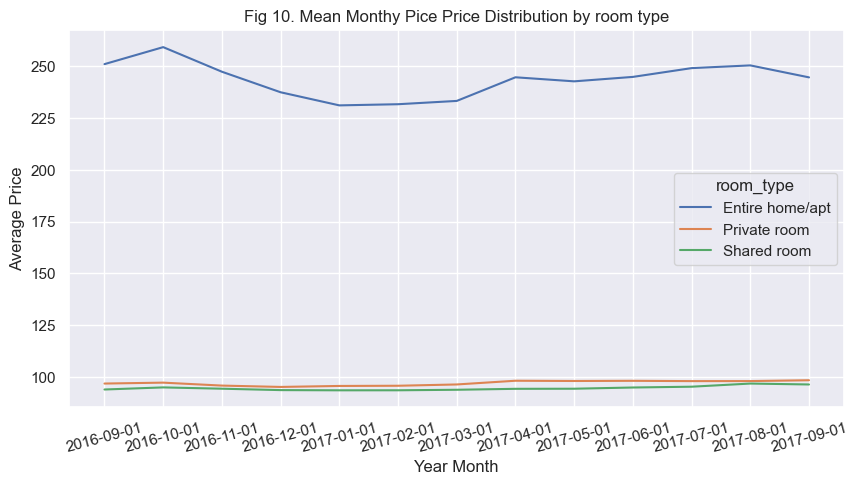

In [29]:
fig = plt.figure(figsize=(10,5),dpi=100)
sns.lineplot(x="Year_Month", y="price",hue='room_type', data=plot_data)
plt.xticks(rotation=15)
plt.title('Fig 10. Mean Monthy Pice Price Distribution by room type')
plt.xlabel ('Year Month')
plt.ylabel('Average Price')
fig.savefig('images/listing_MontlyPrice.png')

The plot above shows the price for each month in 2016 and 2017. We can see that the Entire home/apt is more expensive with mean price around $250. The Private room and the Shared room price average seems to be less than $100.
There is not enough data to confirm but it looks like the listing price drops between november and Febuary and starts picking up i March.

### 2- The most popular neighbourhood

In [30]:
neighbourhood = boston_listings[['neighbourhood_cleansed','id','price']].groupby('neighbourhood_cleansed').agg({'id':"count" , 'price':np.mean}).reset_index().rename(columns={'neighbourhood_cleansed':'neighbourhood','id':'count'}).sort_values(by='count', ascending=False)

In [31]:
print(f"There are {len(boston_listings['neighbourhood_cleansed'].value_counts())} distinct neighbourhood")

There are 25 distinct neighbourhood


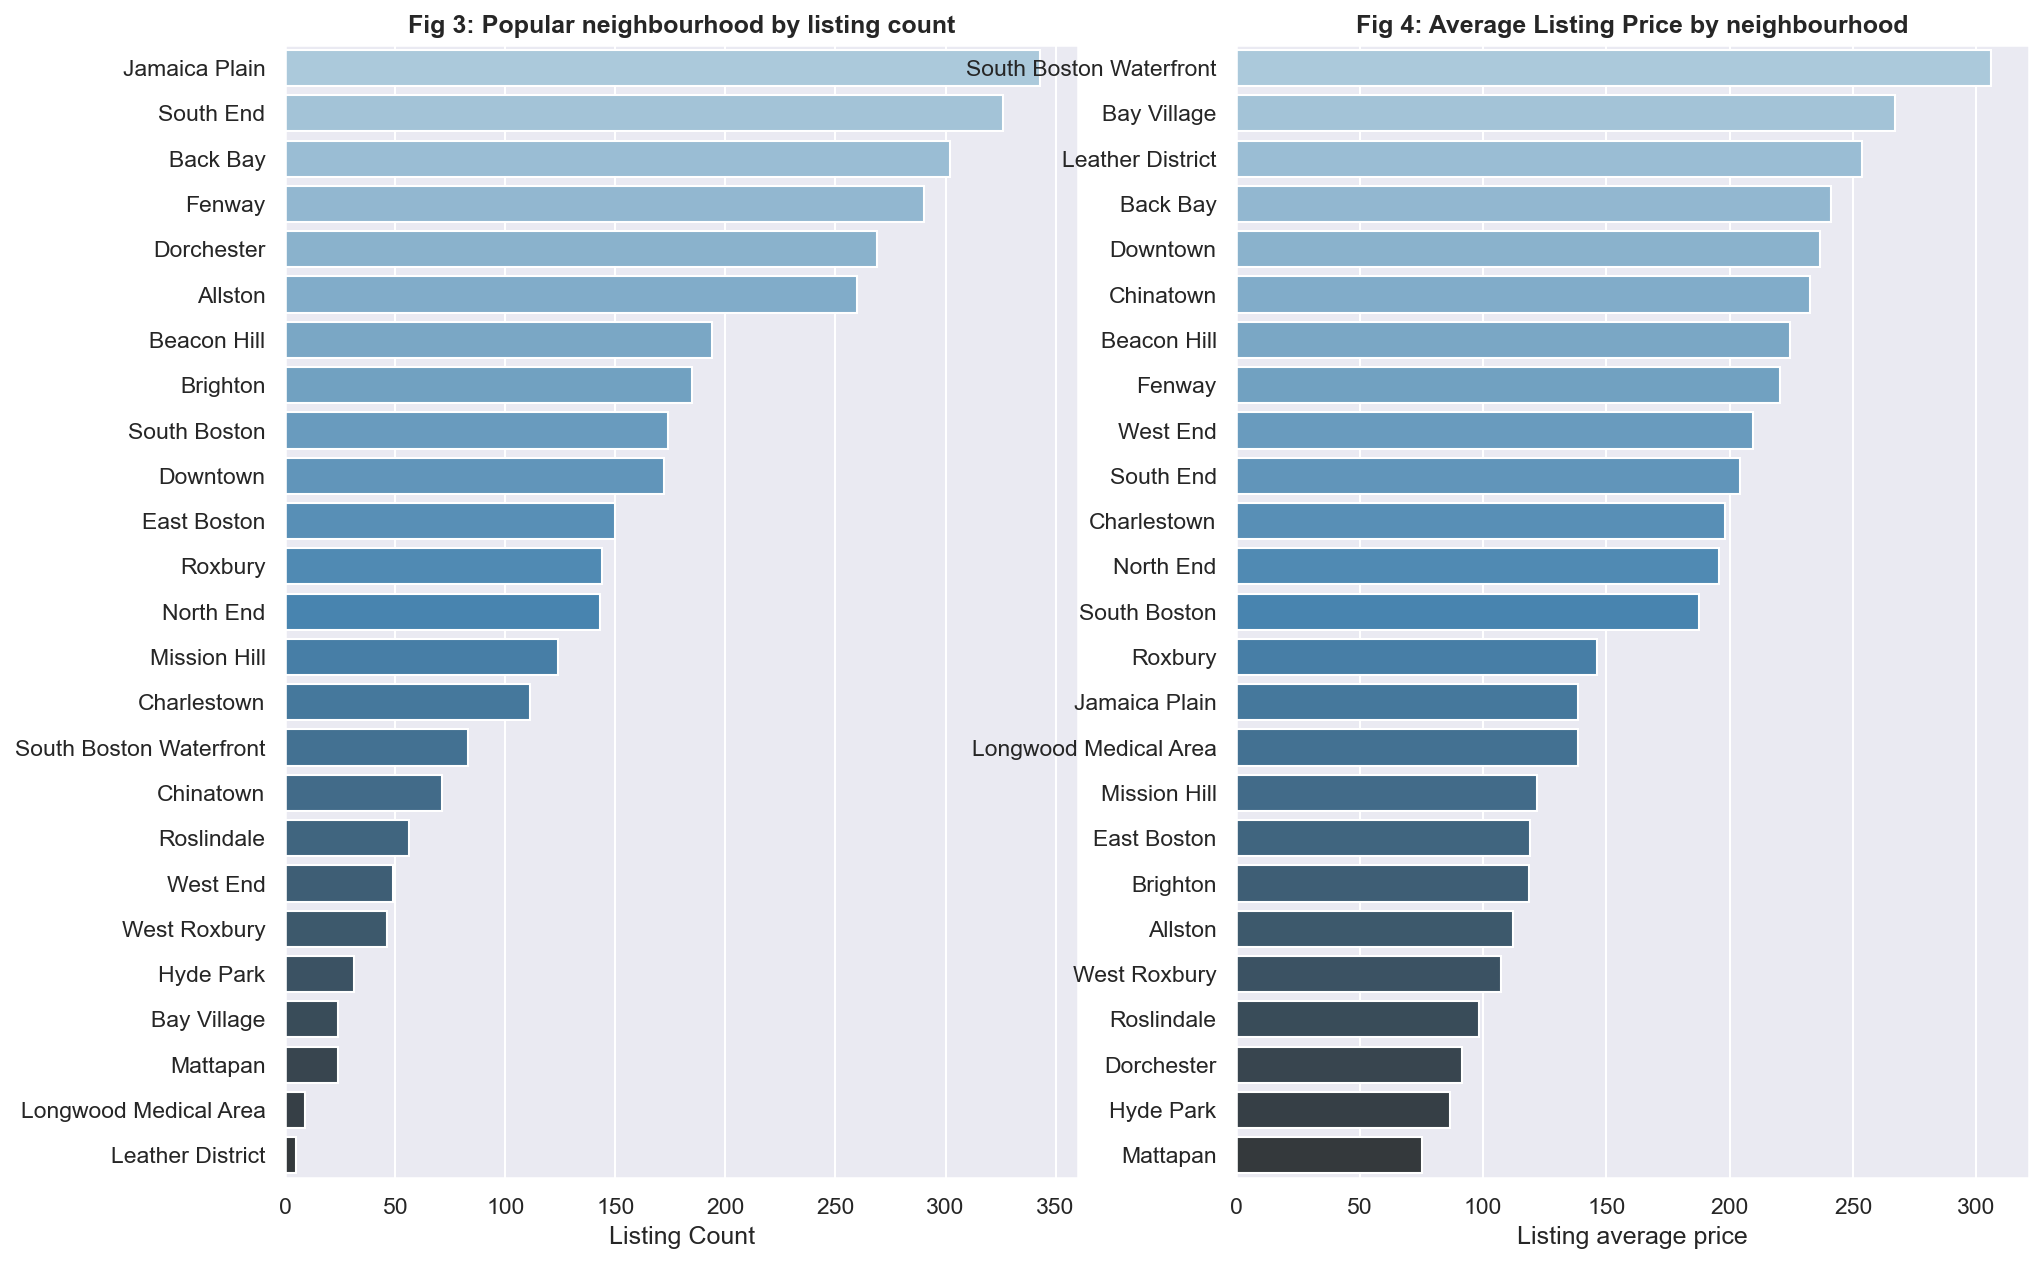

In [32]:
#top_area=boston_listings['neighbourhood_cleansed'].value_counts()#.plot(kind='barh')
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,10),dpi=150)
#top_area[:20].sort_values().plot(kind='barh').set_title('Fig 3: Top 20 neighbourhoods',fontsize=12, weight='bold');
plot_data = boston_listings[['neighbourhood_cleansed','id','price']].groupby('neighbourhood_cleansed').agg({'id':'count','price':'mean'}).reset_index()
plot_data.columns=['neighbourhood','listing_count','price']
plot_data1= plot_data[['neighbourhood','listing_count']].sort_values(by='listing_count', ascending=False)
plot_data2= plot_data[['neighbourhood','price']].sort_values(by='price', ascending=False)

sns.barplot(data=plot_data1, y='neighbourhood',x='listing_count',palette="Blues_d",ax=ax1).set_title('Fig 3: Popular neighbourhood by listing count',fontsize=12,weight='bold')
sns.barplot(data=plot_data2, y='neighbourhood',x='price',palette="Blues_d",ax=ax2).set_title('Fig 4: Average Listing Price by neighbourhood',fontsize=12,weight='bold')
ax1.set_ylabel('')
ax2.set_ylabel('')
ax1.set_xlabel('Listing Count')
ax2.set_xlabel('Listing average price')
fig.savefig('images/top_20_neibourhood.png')


Jamaica Plain,South End, Back Bay and FenWay are the neigbourhood with a lot of listing in Boston. But it is interesting to see that the area with most listings are not the most affordable. Jamaica Plain has an average price of `$138.48` per night and other neighbourhood are even more expensive. Those area are more expensive because they mostly offer the entire room/apt to their guests.

In [33]:
plot_data


,neighbourhood,listing_count,price
0,Allston,260,112.31
1,Back Bay,302,240.95
2,Bay Village,24,266.83
3,Beacon Hill,194,224.44
4,Brighton,185,118.77
5,Charlestown,111,198.05
6,Chinatown,71,232.35
7,Dorchester,269,91.64
8,Downtown,172,236.46
9,East Boston,150,119.15


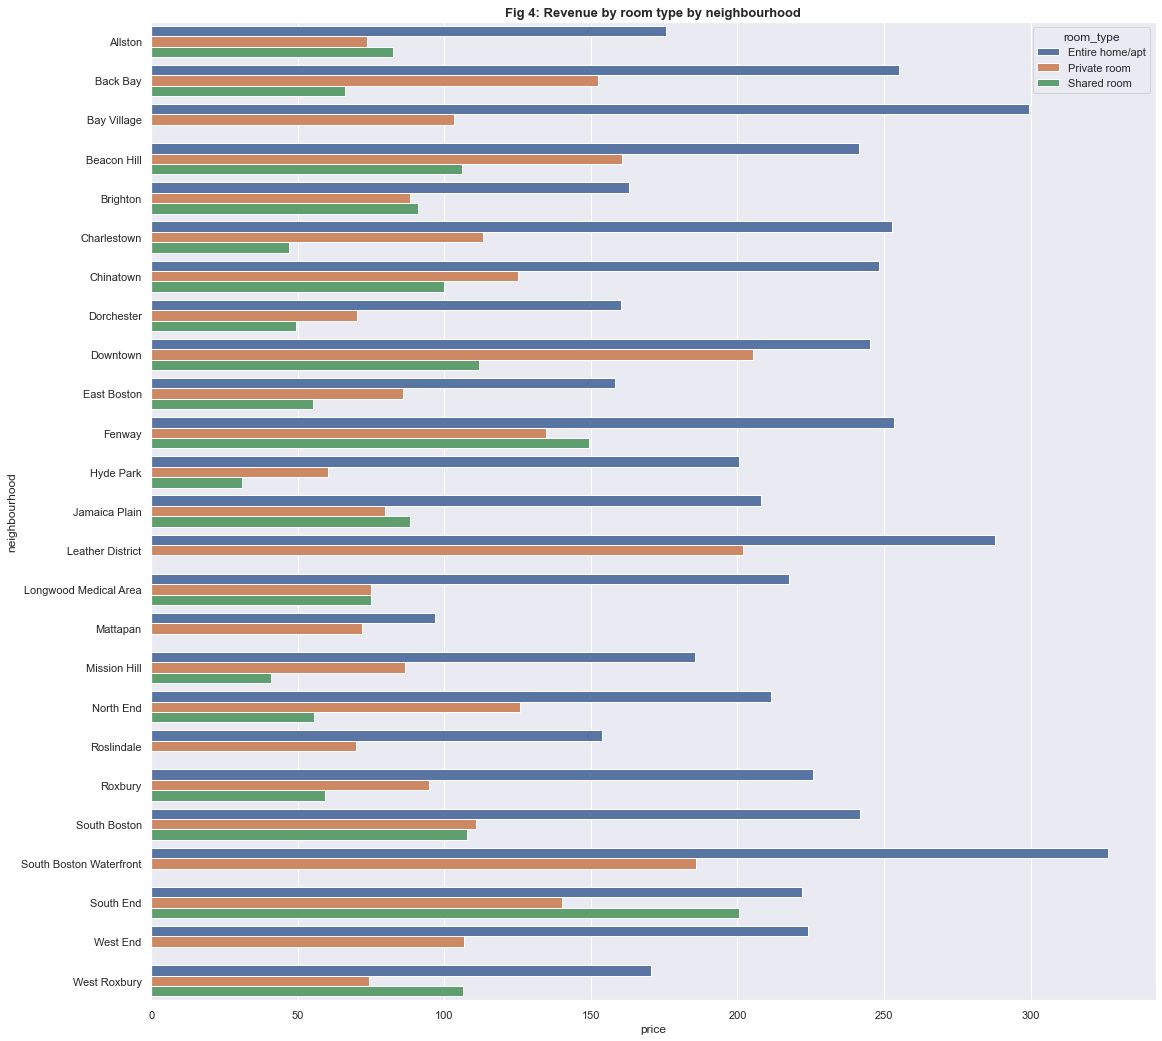

In [34]:
#mean price by neighbourhood and room type
plt.figure(figsize=(18,18))
plot_data = boston_listings[['neighbourhood_cleansed','room_type','price']].groupby(['neighbourhood_cleansed','room_type']).mean().reset_index()
plot_data.columns = ['neighbourhood','room_type','price']
plot_data.sort_values(by=['price','neighbourhood','room_type'], ascending=False)
#plot_data
sns.barplot(data=plot_data, y='neighbourhood',x='price',hue='room_type').set_title('Fig 4: Revenue by room type by neighbourhood',fontsize=13,weight='bold');

The plot above shows the revenue by neighbourhood for each room type. The Entire room/apt is more expensive across all neighbourhoods. The South Boston Waterfront has the highest revenue for room/apt, which is interesting because it has than 100 listings. Jamaica Plain has most listings, but does not generate as much revenue as other neighbourhoods.

In [35]:
neighbourhooddf = boston_listings[['id','neighbourhood_cleansed']]
neighbourhooddf = boston_calendar.merge(neighbourhooddf, how='inner',left_on='listing_id', right_on='id')

revenue = neighbourhooddf[['neighbourhood_cleansed','Year','price']].groupby(['neighbourhood_cleansed','Year']).sum().reset_index()
revenue.columns = ['neighbourhood','Year','TotalRevenue']
revenue= revenue.sort_values(by='TotalRevenue', ascending=False )
revenue['Total Revenue'] =revenue['TotalRevenue']/1000000.0

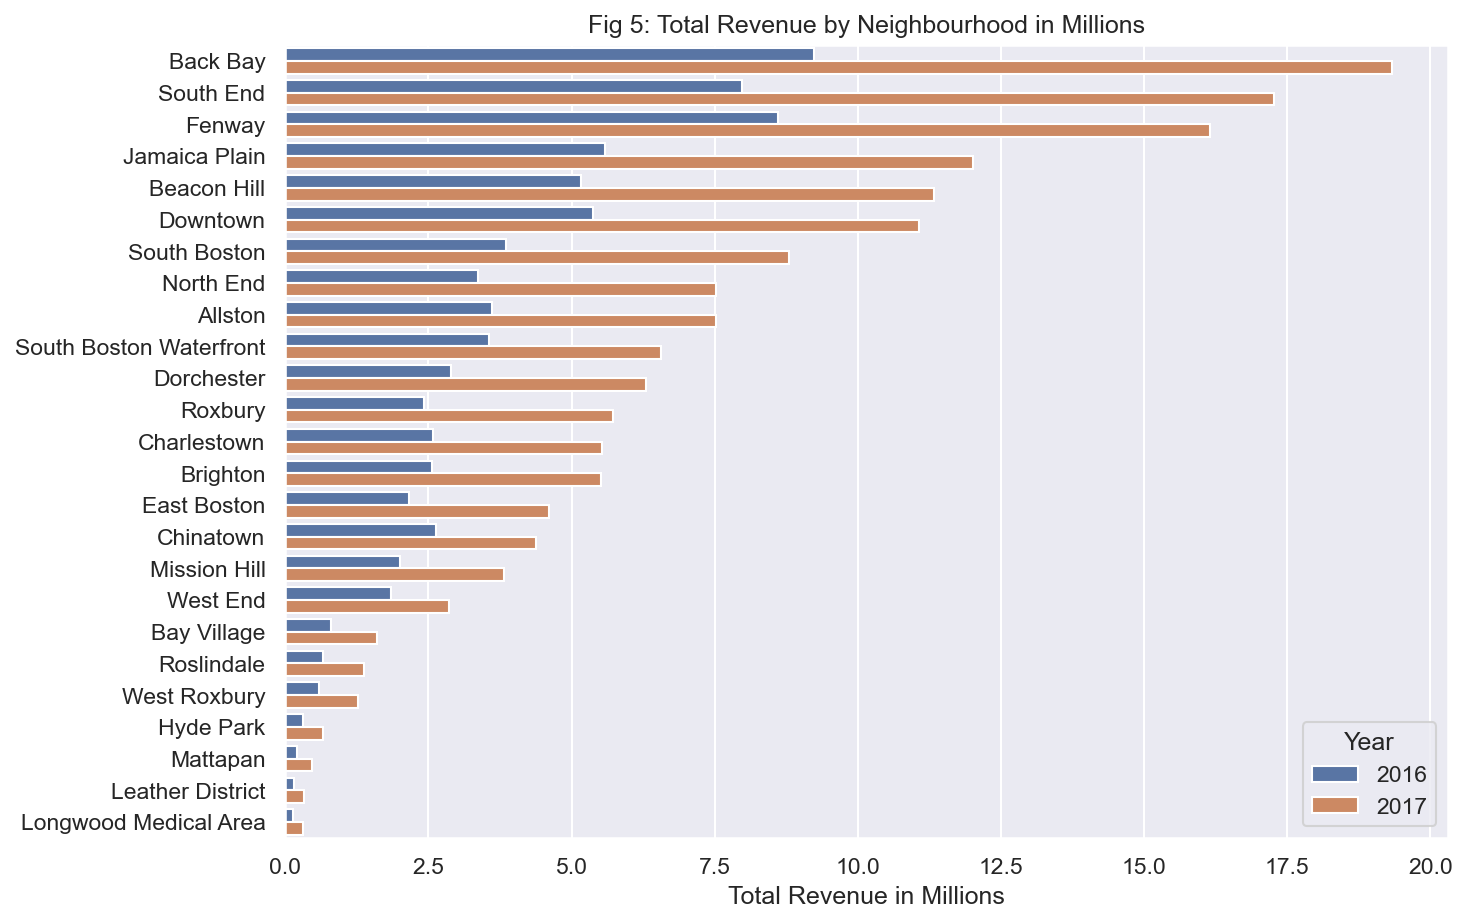

In [36]:
fig = plt.figure(figsize=(10,7), dpi=150)
sns.barplot(y='neighbourhood',x='Total Revenue', hue='Year',data=revenue)
plt.xlabel('Total Revenue in Millions')
plt.ylabel('')
plt.title('Fig 5: Total Revenue by Neighbourhood in Millions', fontsize=12)
fig.savefig('images/revenue.png')

As we can see on the Fig 5. above, the revenue has grown over the years in all neighborhoods. We also notice that neighborhoods with higher listings count are constantly making more revenue. For example, Jamaican Plain the most listing count, but is third in cumulative revenue.

In [37]:
neighbourhood.sort_values(by='price')

,neighbourhood,count,price
15,Mattapan,24,75.12
11,Hyde Park,31,86.55
7,Dorchester,269,91.64
18,Roslindale,56,98.43
24,West Roxbury,46,107.11
0,Allston,260,112.31
4,Brighton,185,118.77
9,East Boston,150,119.15
16,Mission Hill,124,121.97
14,Longwood Medical Area,9,138.44


#### Neigbourhood by room type

In [38]:
boston_listings[['neighbourhood_cleansed','room_type']].value_counts().head(40)

neighbourhood_cleansed   room_type      
Back Bay                 Entire home/apt    263
South End                Entire home/apt    250
Fenway                   Entire home/apt    208
Dorchester               Private room       195
Jamaica Plain            Private room       181
                         Entire home/apt    157
Allston                  Private room       156
Beacon Hill              Entire home/apt    155
Downtown                 Entire home/apt    144
North End                Entire home/apt    119
Brighton                 Private room       103
South Boston             Entire home/apt    102
Allston                  Entire home/apt     98
Roxbury                  Private room        81
East Boston              Private room        77
Brighton                 Entire home/apt     75
Fenway                   Private room        73
South Boston Waterfront  Entire home/apt     71
East Boston              Entire home/apt     70
South End                Private room        69

### 3- Busiest time of the years

In [39]:
# print some generic statistics about the data
print(f"Shape of data: {boston_calendar.shape}")
print(f"Number of missing values in the data:\
{boston_calendar.isnull().sum().sum()}")

Shape of data: (1308890, 13)
Number of missing values in the data:0


In [40]:
boston_calendar.isnull().sum()

listing_id       0
date             0
available        0
price            0
Year             0
Month            0
Month_Year       0
Year_Month       0
weekday          0
season_id        0
season           0
neighbourhood    0
room_type        0
dtype: int64

In [41]:
# get statistics on the numerical columns
boston_calendar.describe().T

,count,mean,std,min,25%,50%,75%,max
listing_id,"1,308,890.00","8,442,117.78","4,500,148.92","3,353.00","4,679,319.00","8,578,709.50","12,796,034.00","14,933,461.00"
price,"1,308,890.00",183.86,163.12,10.00,85.00,150.00,230.00,"7,163.00"
Year,"1,308,890.00","2,016.68",0.47,"2,016.00","2,016.00","2,017.00","2,017.00","2,017.00"
Month,"1,308,890.00",6.53,3.45,1.00,4.00,7.00,10.00,12.00
season_id,"1,308,890.00",2.50,1.11,1.00,2.00,3.00,3.00,4.00


In [42]:
boston_calendar.head()

,listing_id,date,available,price,Year,Month,Month_Year,Year_Month,weekday,season_id,season,neighbourhood,room_type
0,12147973,2017-09-05,No,250.00,2017,9,2017-09,2017-09-01,Tuesday,4,fall,Roslindale,Entire home/apt
1,12147973,2017-09-04,No,250.00,2017,9,2017-09,2017-09-01,Monday,4,fall,Roslindale,Entire home/apt
2,12147973,2017-09-03,No,250.00,2017,9,2017-09,2017-09-01,Sunday,4,fall,Roslindale,Entire home/apt
3,12147973,2017-09-02,No,250.00,2017,9,2017-09,2017-09-01,Saturday,4,fall,Roslindale,Entire home/apt
4,12147973,2017-09-01,No,250.00,2017,9,2017-09,2017-09-01,Friday,4,fall,Roslindale,Entire home/apt


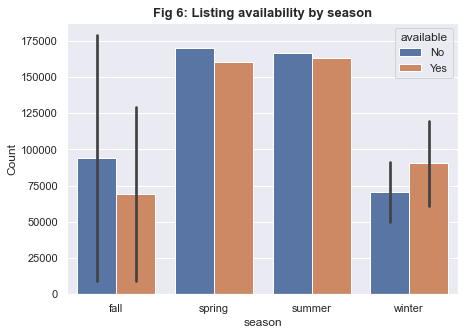

In [43]:
season = boston_calendar[['season','Year','available']].value_counts().reset_index()
season.columns=['season','Year','available','Count']

fig = plt.figure(figsize=(7,5))
sns.barplot(x='season',y='Count',hue='available', data = season).set_title('Fig 6: Listing availability by season',fontsize=13,weight='bold');
fig.savefig('images/listing_by_season.png')

We see that there are more listings availabe in the spring and summer compare to the fall and winter. We can also see that more listings are vacant in winter  the compare to other seasons.

<AxesSubplot:xlabel='Year', ylabel='Count'>

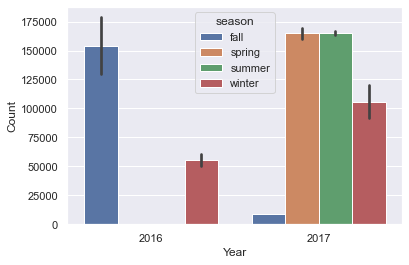

In [44]:
sns.barplot(x='Year',y='Count',hue='season', data = season)

We see that spring and summer  are the busiest seaosons. This is mostly probably because of rough weather conditions in fall and winter in Boston that show similar trend.

In [45]:
plot_data = boston_calendar[['Year','season','weekday','available']].value_counts().reset_index()
plot_data.columns=['Year','season','weekday','available','Count']
#plot_data = plot_data.melt(id_vars=['weekday', 'season','Year'],var_name='available', value_name='Count')
plot_data.head()

,Year,season,weekday,available,Count
0,2016,fall,Tuesday,No,26704
1,2016,fall,Wednesday,No,26448
2,2016,fall,Friday,No,25935
3,2016,fall,Saturday,No,25853
4,2017,spring,Wednesday,No,25615


''

<Figure size 1200x800 with 0 Axes>

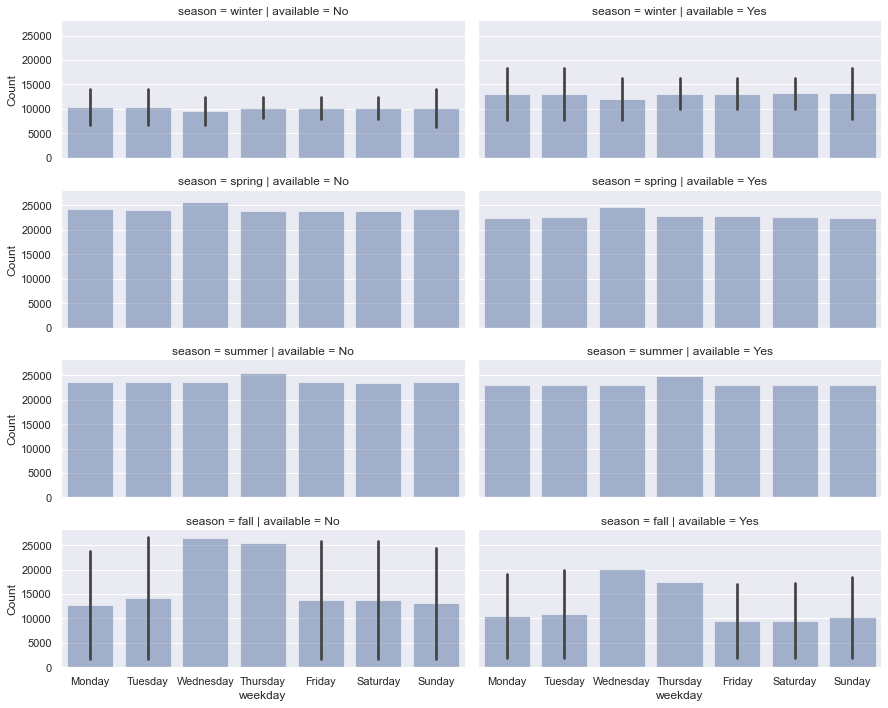

In [46]:
fig = plt.figure(dpi=200)
grid = sns.FacetGrid(plot_data, row='season', col='available',height=2.5, aspect=2.5,row_order=['winter', 'spring','summer', 'fall'])#set_title('Fig 7 Listing availability by season',fontsize=13,weight='bold')
grid.map(sns.barplot, 'weekday', 'Count', alpha=0.5, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday'])
#plt.title('Fig 6: Listing availability distribution by seaon and days of the week', fontsize=12)
fig.savefig('images/listing_by_season_days.png')
;

We also see that in summer and fall, all days of the week seems to have similar trend of occupancy. However, in Fall,Wednesday and Thursday seems to have more visitors.

### 4- What are the features that influence the price in Boston Airbnb? Can we predict the rental price of new listings based on a predictive model?
 #### 1- Features Engineering
  ##### a - Analysing price distribution 
  On the price distribution below, we see that there are few shared rooms with lower price. The entire room/apt seem affordable. We also see that there seems to be a lot of outliers 

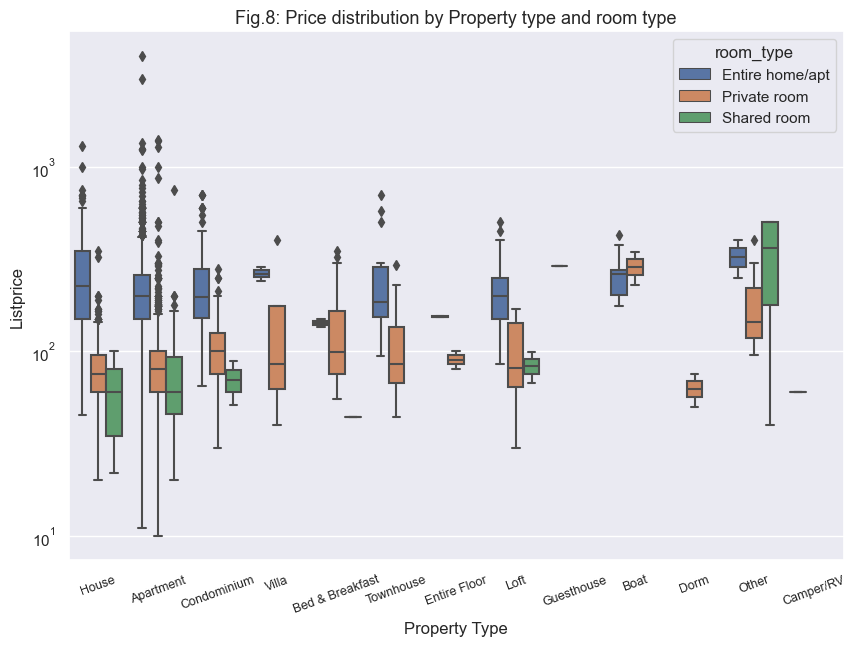

In [47]:
figure,ax = plt.subplots(figsize=(10,7),dpi=100)
ax.set(yscale="log")  
sns.boxplot(x="property_type",y="price",hue="room_type", data=boston_listings).set_title("Fig.8: Price distribution by Property type and room type", fontsize=13)
plt.xticks(rotation=20, fontsize=9)
plt.xlabel('Property Type')
plt.ylabel('Listprice')
figure.savefig('images/price_distribution_property.png')

In [48]:
print("Skewness is {}".format(skew(boston_listings.price)))
print("The mean is {}".format(np.mean(boston_listings.price)))
print("The median is {}".format(np.median(boston_listings.price))) 
print(boston_listings.price.describe())

Skewness is 8.517917676910463
The mean is 173.9258019525802
The median is 150.0
count   3,585.00
mean      173.93
std       148.33
min        10.00
25%        85.00
50%       150.00
75%       220.00
max     4,000.00
Name: price, dtype: float64


The mininum price per night is `$10` ,the mean price `$173.93`, the median `$150`. So the mean is definitively influence by the maximum price which is `$4000`

#### b- Analyzing outliers
An outlier is a value that lies at an abnormally high distance from other values in the dataset. It can be much smaller or much larger. Basically, it doe not show the same pattern as other values. We will be using interquartile range(IQR) to detect outliers. The interquartile range is te range between the first quartile(Q1) and the third quartile (Q3). With this approach, any value which is more than 2.0 IQR+Q3 or less than Q1 - 2.0 IQR is considered as outlier. We will check the outlier in price.

In [49]:
# computing the quartiles and the interquartile range
Q1 = np.percentile(boston_listings.price,25)
Q3 = np.percentile(boston_listings.price,75)
IQR = Q3-Q1
lower_bound = Q1-(IQR*2.0)
upper_bound = Q3+(IQR*2.0)

print("All price lower than {0} and more than {1} will be considered as outliers.".format(lower_bound,upper_bound))

All price lower than -185.0 and more than 490.0 will be considered as outliers.


In [50]:
#dataframe of outliers
outdf=boston_listings.loc[(boston_listings.price<lower_bound) | (boston_listings.price>upper_bound)]
outdf=outdf.sort_values(by=['price','minimum_nights'],ascending=[1,0])
outdf[['neighbourhood_cleansed','room_type','minimum_nights','maximum_nights','price']].tail(5)
#sns.boxplot(x='minimum_nights',y='price',hue='neighbourhood_group', data=outdf

,neighbourhood_cleansed,room_type,minimum_nights,maximum_nights,price
1950,Beacon Hill,Entire home/apt,2,1125,"1,345.00"
2204,Fenway,Private room,1,1125,"1,372.00"
793,Roxbury,Private room,1,1125,"1,400.00"
3055,South Boston Waterfront,Entire home/apt,1,1125,"3,000.00"
2285,Fenway,Entire home/apt,6,1125,"4,000.00"


<Figure size 432x288 with 0 Axes>

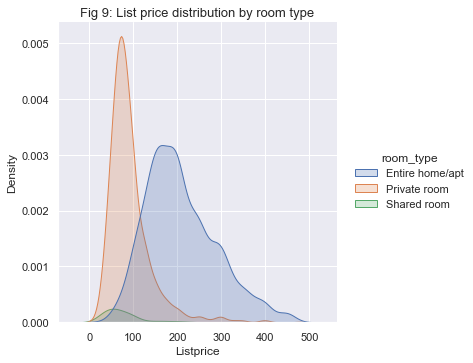

''

In [51]:
finaldf = boston_listings.loc[(boston_listings.price>lower_bound) & (boston_listings.price<upper_bound)]
fig = plt.figure()
sns.displot(finaldf,x='price', hue='room_type' ,kind = "kde", fill=True)
plt.title('Fig 9: List price distribution by room type',fontsize=13)
fig.savefig('images/price_distribution1.png')
plt.xlabel('Listprice')
plt.show()
;

After removing the outliers, we can have a clear picture on price distribution. We see that there are a small number of share room with values less than $200. The private room and Entire home/apt represent the core of the business, with prices in different ranges.


#### c - Numerical features correlation with the price
We have built a function call `select_variables` available in the `data_utils.py` that returns  a dataframe with a top features that correlates well with the target variable.
So below is the list of top 15 numerical features that correlate with price.

In [52]:
num_variables = du.select_variables(boston_listings,target='price',num_var=16)
num_variables.columns

Index(['price', 'cleaning_fee', 'accommodates', 'bedrooms', 'beds',
       'bathrooms', 'guests_included', 'latitude', 'review_scores_location',
       'host_listings_count', 'host_total_listings_count', 'longitude',
       'calculated_host_listings_count', 'reviews_per_month',
       'host_acceptance_rate', 'review_scores_cleanliness'],
      dtype='object')

#### d- Categorical features selection
Below are the categorical features that we have chosen for our model. There is a function in `data_utils.py` called `create_dummy_df`, that will transform these features to one hot encoding, and our 
`select_variables` function will select the columns that correlates well with price

In [53]:
cat_vars =[ 'neighbourhood_cleansed',
             'property_type',
             'room_type',
             'bed_type',
             'cancellation_policy',
             'host_is_superhost',
             'instant_bookable',
             'is_location_exact',
             'require_guest_phone_verification',
             'require_guest_profile_picture'
          ]
cat_vars

['neighbourhood_cleansed',
 'property_type',
 'room_type',
 'bed_type',
 'cancellation_policy',
 'host_is_superhost',
 'instant_bookable',
 'is_location_exact',
 'require_guest_phone_verification',
 'require_guest_profile_picture']

In [54]:
cat_dummy_df= du.create_dummy_df(boston_listings, cat_cols=cat_vars,target_col='price', dummy_na=False)
cat_variabledf = du.select_variables(df=cat_dummy_df,target = 'price',num_var = 20)
cat_variabledf.columns

Index(['price', 'room_type_Private room', 'neighbourhood_cleansed_Dorchester',
       'cancellation_policy_super_strict_30',
       'neighbourhood_cleansed_South Boston Waterfront',
       'neighbourhood_cleansed_Back Bay', 'require_guest_phone_verification_t',
       'property_type_House', 'bed_type_Real Bed',
       'neighbourhood_cleansed_Downtown', 'neighbourhood_cleansed_Fenway',
       'neighbourhood_cleansed_Brighton', 'cancellation_policy_strict',
       'room_type_Shared room', 'neighbourhood_cleansed_Beacon Hill',
       'neighbourhood_cleansed_Jamaica Plain',
       'neighbourhood_cleansed_East Boston', 'bed_type_Futon',
       'is_location_exact_t', 'neighbourhood_cleansed_Mission Hill'],
      dtype='object')

#### 2- Final Cleaning
All the steps elaborate above have been gathered in one function called `clean_data` in `data_utils.py`. it will get the dataframe, perform all the cleaning steps and return the dependent variablesand the target variable. 

#### 3- Selecting the Machine Learning algorithm
In this section, we will choose the Machine Learning (ML) algorithm based on our intuition and then perform training using our training dataset. 
All the steps for prediction are wrapped in a function called `fit_linear_mod`. It will take the dataset cleaned above and generate the results after performing the steps blow:

- Splitting the training and testing dataset
- Splitting prediction labels for the training and testing dataset
- Training the ML model
- return training and test scores

##### a- Testing the baseline model
In this section, we will be implementing our testing approach so that we can evaluate our model's accuracy. We will first generate the output prediction and then we'll start testing it. We will be implementing the following steps here:

- Generating and interpreting the output
- Generating the score
- Visualizing the output

In [55]:
X,y = du.clean_data(df = listings, target_col='price',cat_cols = cat_vars,cols_drops=cols_drops, num_variables=20,cat_variables=26,remove_outliers=True)

In [56]:
test_score, train_score, lm_model, X_train, X_test, y_train, y_test , y_test_preds, y_train_preds = du.fit_linear_mod(X, y, test_size=0.3)

In [57]:
print(pd.DataFrame({'Actual Price':y_test, 'Predicted Price':y_test_preds}).head())
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

      Actual Price  Predicted Price
2003        199.00           244.87
3454        150.00           101.85
2721         55.00            77.93
1931        150.00           157.21
2840        264.00           268.55
The rsquared on the training data was 0.6934717571528012.  The rsquared on the test data was 0.6998542939777185.


Above is the top 5 rows from our actual price and predicted price. We can also see that the `R-squared` is 0.69 on the training data, an about 0.70 on the test data. This shows well how confident we are in our prediction.

#### 4- Visualizing the output.
We are going to use a visualization graph in this section, to identify the kind of error we have or see how close the **actual price** is close to our **predicted prices** in general.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


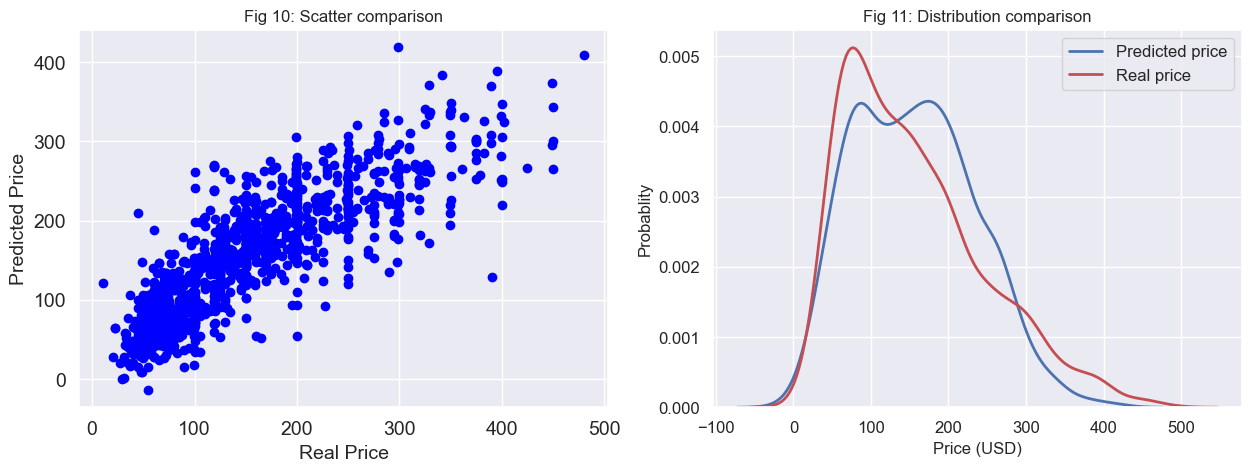

In [58]:
fig = plt.figure(figsize =(15, 5),dpi=100)
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = plt.axes(aspect = 'equal')
plt.subplot(121)
plt.title('Fig 10: Scatter comparison', fontsize=12)
plt.scatter(y_test, y_test_preds, color='blue')
plt.xlabel('Real Price', fontsize=14)
plt.ylabel('Predicted Price', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(122)
sns.distplot(y_test_preds, hist=False,
             kde_kws={'color': 'b', 'lw': 2, 'label': 'Predicted price'})
sns.distplot(y_test, hist=False,
             kde_kws={'color': 'r', 'lw': 2, 'label': 'Real price'})
plt.title('Fig 11: Distribution comparison', fontsize=12)
plt.ylabel('Probablity', fontsize=12)
plt.xlabel('Price (USD)', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['Predicted price', 'Real price'], prop={"size":12})
plt.show()

The Fig.10 shows that our actual price has a strong positive correlation with the predicted price. On Fig 11, we show similar result with the same trend. From this plot, we can see that we can predict the price with good confidence.

#### 5 - Evaluate the Results
With 15 top numerical columns, 20 categorical columns and after proceding the amenities column, we have achieved a `R-Squared` of about 0.70. 
The scatter plot above, showa a strong positive correlation between the `actual and predicted prices`. Looking at both plot, we see that the accuracy is more accurate for price range less than '$200.0' since the most most data points are within that range. 

#### 6 - Can we do better ?
We randomly picked the top 15 nuerical features and 20 categorical features on the base model below. We are going set a grid of numbers and train our model over that set to see the optimal number of features that results to better results.

We have another function in our `data-utils.py` called `find_optimal_lm_mod` that will help.
As we can see on the result below, the best number of numerical columns is 19 and 30 categoricals features. This lead to a slight higher test score of **0.701** on test data.

In [67]:

num_variables = list(range(1, 25))
cat_variables = [10, 15, 20, 25, 30, 35, 40, 45, 51]
test_size = 0.3
random_state=42
# find the best combination of selection of numerical and categorical variables,  
# and return the corresponding x_train, x_test, y_train, y_test
results, r2_scores_test, r2_scores_train, best_r2_score_test, best_num_variables, \
    best_cat_variables, best_lm_model, x_train, x_test, y_train, y_test \
    = du.find_optimal_lm_mod(df =boston_listings,number_num_variables= num_variables, number_cat_variables=cat_variables, cat_cols=cat_vars, target_col='price', 
                       test_size=0.3 , random_state=42)
                        
print (f'best_r2_score_test: {best_r2_score_test}')
print (f'best_num_variables: {best_num_variables}')
print (f'best_cat_variables: {best_cat_variables}')


best_r2_score_test: 0.7043896154818627
best_num_variables: 23
best_cat_variables: 45


### Trying Random Forest and best Features from Linear Regression 

In [68]:
# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

X,y = du.clean_data(df = listings, target_col='price',cat_cols = cat_vars,cols_drops=cols_drops, num_variables=best_num_variables,cat_variables=best_cat_variables,remove_outliers=True)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


RFR = RandomForestRegressor(n_estimators = 100, max_depth=20,random_state=42)
RFR.fit(x_train, y_train)
y_test_preds = RFR.predict(x_test)
y_train_preds = RFR.predict(x_train)

#r2 value
r2_scores_test = r2_score(y_test, y_test_preds)
r2_scores_train = r2_score(y_train, y_train_preds)

print (f'r2_score_train: {r2_scores_train}')
print (f'r2_score_test: {r2_scores_test}')


r2_score_train: 0.9586179057164542
r2_score_test: 0.7371727452602705


We see that with Random forest, we achieve a pretty good score on training data, but not as good on test data.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


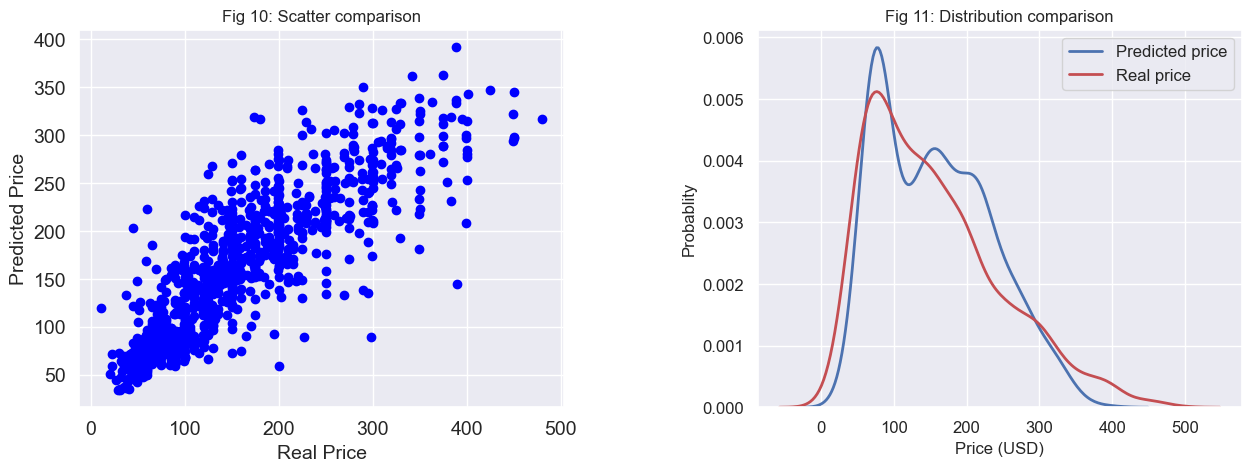

In [63]:
fig = plt.figure(figsize =(15, 5),dpi=100)
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = plt.axes(aspect = 'equal')
plt.subplot(121)
plt.title('Fig 12: Scatter comparison using RF', fontsize=12)
plt.scatter(y_test, y_test_preds, color='blue')
plt.xlabel('Real Price', fontsize=14)
plt.ylabel('Predicted Price', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(122)
sns.distplot(y_test_preds, hist=False,
             kde_kws={'color': 'b', 'lw': 2, 'label': 'Predicted price'})
sns.distplot(y_test, hist=False,
             kde_kws={'color': 'r', 'lw': 2, 'label': 'Real price'})
plt.title('Fig 13: Distribution comparison using RF', fontsize=12)
plt.ylabel('Probablity', fontsize=12)
plt.xlabel('Price (USD)', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['Predicted price', 'Real price'], prop={"size":12})
plt.show()